In [20]:
from keras.datasets import boston_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
(x_train, y_train), (x_test, y_test),  = boston_housing.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


((404, 13), (404,), (102, 13), (102,))

In [8]:
x_train[0:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

In [10]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX",
    "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT"
]

df_x = pd.DataFrame(x_train, columns=feature_names)

df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [11]:
df_y = pd.Series(y_train, name='Median value')
df_y.head()

0    15.2
1    42.3
2    50.0
3    21.1
4    17.7
Name: Median value, dtype: float64

In [17]:
df = pd.concat([df_x, df_y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median value
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


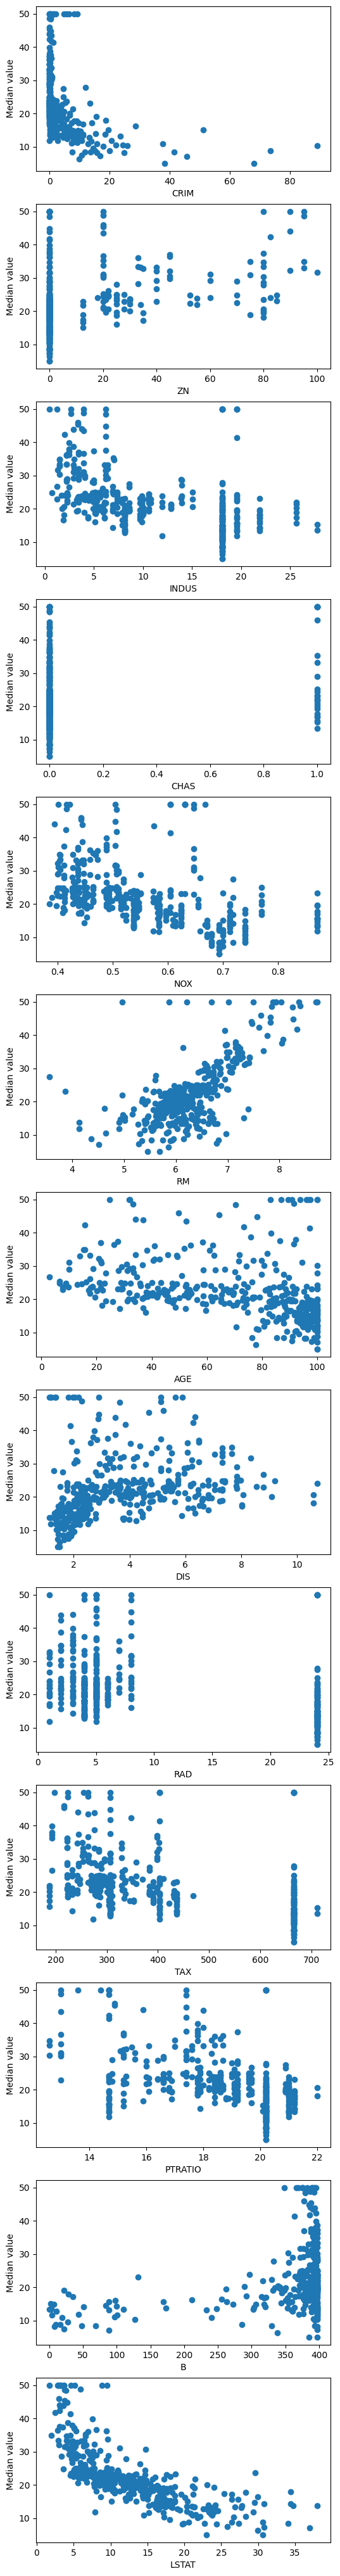

In [29]:
n = len(df_x.columns)
n

fig, axes = plt.subplots(n, 1, figsize=(6, 4*n))


for ax, feature in zip(axes, df_x.columns):
    ax.scatter(df[feature], df_y)
    ax.set_xlabel(feature)
    ax.set_ylabel(df_y.name)
    
    